In [324]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

#Importando o modelo machine learnig
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pickle



In [431]:
# importar csv
data = pd.read_csv("nge_dados_input.csv")
#data_semNF = pd.read_csv("nge_dados_input_semNF.csv") # jobs sem nota está emoutro método

In [432]:
data.dtypes

id                    int64
entidade              int64
fornecedor            int64
complexidade          int64
stat_pagto            int64
qtd_pag_word          int64
qtd_pag_estimado    float64
qtd_pg_word           int64
qtd_carc              int64
qtd_tabela            int64
qtd_image             int64
qtd_estilos         float64
pag_final             int64
dtype: object

In [433]:
data.head(12)

,id,entidade,fornecedor,complexidade,stat_pagto,qtd_pag_word,qtd_pag_estimado,qtd_pg_word,qtd_carc,qtd_tabela,qtd_image,qtd_estilos,pag_final
0,224323,0,0,1,0,87,140.0,87,116142,474,712,60.0,140
1,224325,0,0,1,0,82,122.0,82,108307,76,94,69.0,122
2,225392,0,0,3,0,41,70.0,30,41144,28,24,23.0,52
3,225392,0,0,3,0,41,70.0,42,62913,401,666,21.0,52
4,225531,0,0,2,0,36,48.0,36,37548,239,426,17.0,48
5,228711,2,0,1,0,77,108.0,77,101967,286,487,17.0,88
6,226842,0,0,1,0,46,66.0,46,96474,99,114,37.0,66
7,228307,0,0,1,0,62,95.0,62,43155,40,73,25.0,70
8,228354,0,0,1,0,76,110.0,76,129122,14,10,26.0,96
9,228437,0,0,2,0,18,18.0,80,145038,175,370,35.0,18


In [434]:
data['qtd_pg_word'].unique()

array([ 87,  82,  30,  42,  36,  77,  46,  62,  76,  80,  13,  34,  52,
        18,  78,  50,  47,  54,  88,  91,  38, 214,  22,  26,  92,  14,
        40,  81,  63, 216,  24,  33, 195,  29,  60, 107,  85,  68,  41,
       112,  45,  19,  51,  31,  56,  72,  28,  21,  12,  17, 131,  67,
       207,  43,  86,  90,  49,  39,  59,  48,  57,  73,  23,  37])

In [435]:
data['qtd_pag_word'].unique()

array([ 87,  82,  41,  36,  77,  46,  62,  76,  18,  33,  34,  57,  22,
        78,  50,  38,  54,  88,  91,  80, 214,  26,  83,  40,  81,  63,
       216,  51,  27, 195,  29,  58,  92, 107,  85,  67,  24, 112,  45,
        19,  31,  56,  72,  28,  12, 158,  66, 207,  43,  17,  86,  90,
        49,  59,  48, 100,  39,  42,  32,  73,  23])

In [436]:
data[data['qtd_pag_word']!=data['qtd_pg_word']][['id','qtd_pag_word','qtd_pg_word','pag_final']]

,id,qtd_pag_word,qtd_pg_word,pag_final
2,225392,41,30,52
3,225392,41,42,52
9,228437,18,80,18
10,228603,33,13,40
12,228837,57,52,68
13,229294,22,18,34
17,229536,38,47,84
27,231210,83,92,112
28,230571,80,14,110
34,231890,51,52,76


In [437]:
data[(data['qtd_pg_word']-data['qtd_pag_word'])>10][['id','qtd_pag_word','qtd_pg_word','pag_final']]

,id,qtd_pag_word,qtd_pg_word,pag_final
9,228437,18,80,18
67,233893,66,77,98
70,233904,38,50,68


In [438]:
data[data['qtd_pag_word']==data['pag_final']][['id','qtd_pag_word','qtd_pg_word','pag_final']]


,id,qtd_pag_word,qtd_pg_word,pag_final
9,228437,18,80,18


In [439]:
# Deletar linha quando a quantidade de pagina do word for igual a quantidade de pagina final

# critério da diferença entre qtd pagina digitado e qtd pagina raspado do word
criterio01= ((data['qtd_pg_word']-data['qtd_pag_word'])>10)

# critério de qtd pagina digitado e qtd pagina da nota fiscal serem iguais
criterio02=(data['qtd_pag_word']==data['pag_final'])
data[(criterio02 & criterio01)][['id','qtd_pag_word','qtd_pg_word','pag_final']]


,id,qtd_pag_word,qtd_pg_word,pag_final
9,228437,18,80,18


In [440]:
# Deletar linha quando a quantidade de pagina do word for igual a quantidade de pagina final
# caso que o 
data = data[~(criterio02 & criterio01)]

In [763]:
data[data["pag_final"]>150]

,id,entidade,fornecedor,complexidade,stat_pagto,qtd_pag_word,qtd_pag_estimado,qtd_pg_word,qtd_carc,qtd_tabela,qtd_image,qtd_estilos,pag_final,qtd_carc_normal
23,231201,0,0,0,0,214,420.0,214,425343,319,524,19.0,340,0.738572
32,3,2,0,1,0,216,300.0,216,346608,157,339,54.0,212,0.597876
40,232098,0,0,1,0,195,360.0,195,413596,26,20,19.0,340,0.717581
65,233884,0,0,1,0,158,220.0,131,208458,288,300,7.0,176,0.351006
71,233908,0,0,1,0,207,310.0,207,571640,399,381,24.0,296,1.000000


# fazer um critério de seleção de dados:
### se o dado colhido na tabela (qtd_pag_word) tiver diferente da raspagem do word (qtd_pg_word) mais de 5 pontos deve retirar do arquivo de entrada. 
###  - incluir a coluna raspagem do word (qtd_pg_word)  para treinamento

In [441]:
data['id'].count()

103

In [442]:
#
# normalizar a quantidade de caracteres
#

# X["qtd_carc_normal"]=(X.qtd_carc-X.qtd_carc.min())/(X.qtd_carc.max()-X.qtd_carc.min())

In [443]:
data.describe()

,id,entidade,fornecedor,complexidade,stat_pagto,qtd_pag_word,qtd_pag_estimado,qtd_pg_word,qtd_carc,qtd_tabela,qtd_image,qtd_estilos,pag_final
count,103.000000,103.000000,103.000000,103.000000,103.0,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,230365.398058,0.252427,0.058252,1.446602,0.0,56.932039,91.932039,54.893204,83663.796117,265.213592,352.466019,26.825243,76.271845
std,23094.100900,0.572549,0.235365,0.637522,0.0,39.832065,62.057415,39.587558,86456.364381,159.830342,217.833981,13.101734,53.830561
min,3.000000,0.000000,0.000000,0.000000,0.0,12.000000,35.000000,12.000000,12032.000000,2.000000,2.000000,3.000000,22.000000
25%,230981.500000,0.000000,0.000000,1.000000,0.0,32.500000,48.000000,29.000000,31167.000000,120.500000,171.000000,19.000000,45.000000
50%,233474.000000,0.000000,0.000000,1.000000,0.0,46.000000,75.000000,45.000000,62913.000000,286.000000,339.000000,23.000000,68.000000
75%,235309.000000,0.000000,0.000000,2.000000,0.0,74.500000,110.000000,70.000000,102817.000000,396.000000,461.500000,29.500000,88.000000
max,235831.000000,2.000000,1.000000,3.000000,0.0,216.000000,420.000000,216.000000,571640.000000,550.000000,823.000000,71.000000,340.000000


# Normalizar?

In [444]:
# padronização/escalonamento dos dados.
#
# Escalas Diferentes Podem Ser um Problema? Normalizar?
# https://www.linkedin.com/pulse/pr%C3%A9-processamento-de-dados-intui%C3%A7%C3%A3o-e-pr%C3%A1tica-em-lucas-thiago-zane/
# https://medium.com/tentando-ser-um-unic%C3%B3rnio/porqu%C3%AA-e-quando-%C3%A9-necess%C3%A1rio-normalizar-os-dados-92e5cce445aa
#
#

In [445]:
# O objetivo da normalização é alterar os valores das colunas numéricas no conjunto de dados para uma escala comum,
# sem distorcer as diferenças nos intervalos de valores.
# Esse método é necessário apenas quando os parâmetros tiverem intervalos muito diferentes.

In [446]:
# a normalização não é necessária para a Regressão Logística.
# a normalização poderá fazer sentido no tratamento de outliers.
# Deixar variáveis com escalas similares é algo importante em algoritmos que trabalham com distâncias euclidianas,
# como é o caso das regressões lineares multivariadas.
# random florest não envolvem o uso de distâncias euclidianas.

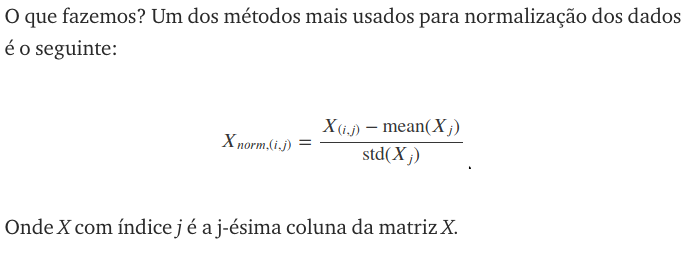

In [447]:
# O que essa fórmula está dizendo é que pra cada observação em ambas as variáveis,
# eu respondo a seguinte pergunta:quantos desvios padrões esse valor está longe da média? 

In [448]:
# “E se eu quiser modelar um classificador usando Regressão Logística, eu precisaria normalizar meus dados?”
# Tecnicamente falando, a normalização não é necessária para a Regressão Logística, 
# pois ela trata com probabilidades relacionadas as classes envolvidas, 
# se preocupa em desenhar um “fronteira” de decisão em torno de um limiar (o famoso threshold).
# Deixar variáveis com escalas similares é algo importante em algoritmos que trabalham com distâncias euclidianas, 
# como é o caso das regressões lineares multivariadas. 

In [449]:
# Os algoritmos de otimização:
#Adaptive Gradient (AdaGrad)
#Stochastic Gradient Descent (SGD)
#Gradiente Descendente com Momentum (momentum)
#Adaptative Delta Learning (adadelta)
#Nesterov Accelerated Gradient (nag)
#Otimizador RMSprop (rmsprop)


### normalização (StandardScaler)

from sklearn.preprocessing import StandardScaler

- sc_X = StandardScaler()
- X_train = sc_X.fit_transform(X_train)
- X_test = sc_X.transform(X_test)

- sc_y = StandardScaler()
- y_train = sc_y.fit_transform(y_train)

#### Uma maneira fácil de usar o Pandas : (aqui eu quero usar a normalização média)

- normalized_df=(df-df.mean())/df.std()
#### para usar a normalização min-max:

- normalized_df=(df-df.min())/(df.max()-df.min())

#### Você pode usar o pacote sklearn e seus utilitários de pré-processamento associados para normalizar os dados.

- import pandas as pd
- from sklearn import preprocessing

- x = df.values #returns a numpy array
- min_max_scaler = preprocessing.MinMaxScaler()
- x_scaled = min_max_scaler.fit_transform(x)
- df = pd.DataFrame(x_scaled)

In [450]:
#
# normalizar a quantidade de caracteres
#
data.loc[:,'qtd_carc_normal'] = pd.Series((data.qtd_carc-data.qtd_carc.min())/(data.qtd_carc.max()-data.qtd_carc.min()))

In [451]:
#########################################################
# INÍCIO DA PARTE DE MACHINE LEARNIG  \
# RANDOM FOREST
########################################################

In [452]:
# instalar biblioteca scikit-learn
#! pip install -U scikit-learn

In [453]:
data.columns

Index(['id', 'entidade', 'fornecedor', 'complexidade', 'stat_pagto',
       'qtd_pag_word', 'qtd_pag_estimado', 'qtd_pg_word', 'qtd_carc',
       'qtd_tabela', 'qtd_image', 'qtd_estilos', 'pag_final',
       'qtd_carc_normal'],
      dtype='object')

In [768]:
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos"]
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image','qtd_carc_normal']
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal']


#colunas_X= ['complexidade','entidade','qtd_pag_word', 'qtd_pg_word','qtd_tabela','qtd_image', 'qtd_carc']

colunas_X= ['qtd_pag_word', 'qtd_pg_word','qtd_tabela','qtd_image','qtd_carc']


colunas_y=['pag_final']
X = data[colunas_X]
y = data[colunas_y]

In [769]:
X.columns

Index(['qtd_pag_word', 'qtd_pg_word', 'qtd_tabela', 'qtd_image', 'qtd_carc'], dtype='object')

In [770]:
# método train_test_split, Scikit-Learn 
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, test_size=0.10, random_state=6,stratify=X['qtd_pag_word'])

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [713]:
X_train_f.shape, X_test_f.shape, y_train_f.shape, y_test_f.shape

((92, 10), (11, 10), (92, 1), (11, 1))

In [714]:
y_test_f.head()

,pag_final
0,140
96,44
31,76
89,40
71,296


In [715]:
X_train_f

,id,complexidade,qtd_pag_estimado,qtd_pag_word,qtd_pg_word,qtd_carc,qtd_tabela,qtd_image,qtd_estilos,qtd_carc_normal
101,235700,2,48.0,38,37,40157,354,334,16.0,0.050258
24,230874,2,48.0,22,22,19773,380,618,22.0,0.013833
45,232625,1,150.0,107,107,144490,517,795,31.0,0.236698
38,231928,2,48.0,34,34,56358,104,119,25.0,0.079209
48,231274,1,110.0,78,76,83989,372,608,50.0,0.128585
...,...,...,...,...,...,...,...,...,...,...
80,235353,3,70.0,46,46,64211,298,307,22.0,0.093242
85,235519,1,90.0,59,59,122719,462,442,23.0,0.197794
100,235514,1,104.0,56,41,51127,371,373,18.0,0.069861
74,235092,1,72.0,43,43,66193,379,381,19.0,0.096784


In [716]:
X_train_f.dtypes

id                    int64
complexidade          int64
qtd_pag_estimado    float64
qtd_pag_word          int64
qtd_pg_word           int64
qtd_carc              int64
qtd_tabela            int64
qtd_image             int64
qtd_estilos         float64
qtd_carc_normal     float64
dtype: object

In [717]:
y_train_f

,pag_final
101,44
24,34
45,104
38,48
48,100
...,...
80,54
85,78
100,72
74,68


In [718]:
print(X_train_f.shape,y_train_f.shape)

(92, 10) (92, 1)


In [719]:
print(X_train_f.shape,y_train_f.values.ravel().shape)

(92, 10) (92,)


In [720]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
#modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

#modelo.fit(X_train_f, y_train_f)
modelo = modelo.fit(X_train_f, y_train_f.values.ravel())

# https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
#.values will give the values in an array. (shape: (n,1)
#.ravel will convert that array shape to   (n, )

In [721]:
p = modelo.predict(X_test_f)

In [722]:
p

array([110,  48,  66,  44, 340,  48,  38,  98,  98,  34,  86])

In [723]:
print(p.shape,y_test_f.shape)

(11,) (11, 1)


In [724]:
y_test_f

,pag_final
0,140
96,44
31,76
89,40
71,296
21,48
35,38
30,100
46,96
68,38


In [725]:
# Calculando RMSE utilizando scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test_f,p)))
# RMSE:  78.92781512242689
# RMSE:  78.58244078673046
# RMSE:  19.371957239079567
# RMSE:  53.665631459994955
# RMSE:  26.642413213111567 sem a feature quantidade de estilo
# RMSE:  28.926238482168273   ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']


RMSE:  16.591344950688214


In [726]:
# Save Model Using Pickle
# save the model to disk

filename = 'finalized_model-forest3a.sav'
pickle.dump(modelo, open(filename, 'wb'))
 

In [727]:
##############################################################################################################

In [728]:
#########################################################
# FIM RANDOM FOREST
########################################################

In [729]:
# https://github.com/WalnerPessoa/Medical-Cost-Personal/blob/master/Aula%205%20-%20Regress%C3%A3o%20linear%20para%20prever%20as%20despesas%20m%C3%A9dicas%20de%20um%20paciente%20.ipynb


# Criando uma lista com os nomes dos atributos
#feature_cols = ['age','sex','bmi','children','smoker']

# Usando a lista para escolher um subconjunto do dataframe original
#X = data[feature_cols]

# Selecionando a Série no dataframe
#y = data.charges

# Dividindo entre conjunto de treinamento e teste
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Ajsutando o modelo (Aprendendo os coeficientes)
#linreg.fit(X_train, y_train)

# Fazendo predições no conjunto de teste
#y_pred = linreg.predict(X_test)

# Calculando RMSE para nossas predições
#print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [730]:
##############################################################################################################

In [731]:
#########################################################
# INÍCIO DA PARTE DE MACHINE LEARNIG  \
# LINEAR REGRESSION
########################################################

In [732]:
# prepara dados de entrada X e dados de saida Y
#colunas_X= ['entidade', 'fornecedor', 'complexidade', 'stat_pagto','qtd_pag_word', 'qtd_carc', 'qtd_tabela','qtd_image']
# colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']
#colunas_X= ['complexidade', 'qtd_pag_word', "qtd_carc_normal",'qtd_tabela','qtd_image']
#colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_pag_estimado','qtd_carc','qtd_tabela','qtd_image']
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos"]
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal']


#colunas_X= ['id','qtd_pag_word', 'qtd_pag_estimado', 'qtd_carc','qtd_tabela','qtd_image']
colunas_X= ['id','complexidade', 'qtd_pag_estimado', 'qtd_pag_word', 'qtd_pg_word','qtd_carc','qtd_tabela','qtd_image',"qtd_estilos",'qtd_carc_normal']


colunas_y=['pag_final']
X = data[colunas_X]
y = data[colunas_y]

In [733]:
# método train_test_split, Scikit-Learn 
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10,random_state=6) # feito com 0,10 e agora com 0,20

In [734]:
####
####   selecionar a FEATURES para MODELO
####
# mantendo algumas features para compara resultados no final no arquivo X_train_ref
X_test_ref = X_test.copy()
X_train_ref= X_train.copy()

# X_test = X_test_ref[['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']]

#X_test = X_test_ref[[ 'qtd_pag_word', 'qtd_tabela','qtd_image','qtd_carc_normal']]
#X_test = X_test_ref[['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']]

X_test = X_test_ref[[ 'qtd_pag_word','qtd_pg_word','qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']]


#X_train = X_train_ref[['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']]

#X_train = X_train_ref[['qtd_pag_word', 'qtd_tabela','qtd_image','qtd_carc_normal']]
#X_train = X_train_ref[['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']]

X_train = X_train_ref[['qtd_pag_word','qtd_pg_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']]



In [735]:
X_test_ref.columns

Index(['id', 'complexidade', 'qtd_pag_estimado', 'qtd_pag_word', 'qtd_pg_word',
       'qtd_carc', 'qtd_tabela', 'qtd_image', 'qtd_estilos',
       'qtd_carc_normal'],
      dtype='object')

In [736]:
X_train

,qtd_pag_word,qtd_pg_word,qtd_tabela,qtd_image,qtd_estilos,qtd_carc_normal
101,38,37,354,334,16.0,0.050258
24,22,22,380,618,22.0,0.013833
45,107,107,517,795,31.0,0.236698
38,34,34,104,119,25.0,0.079209
48,78,76,372,608,50.0,0.128585
...,...,...,...,...,...,...
80,46,46,298,307,22.0,0.093242
85,59,59,462,442,23.0,0.197794
100,56,41,371,373,18.0,0.069861
74,43,43,379,381,19.0,0.096784


In [737]:
y_train

,pag_final
101,44
24,34
45,104
38,48
48,100
...,...
80,54
85,78
100,72
74,68


In [738]:
##### machine learnig

#Instanciando o estimador
linreg = LinearRegression()

#Ajustando o modelo ao conjunto de treino
linreg.fit(X_train, y_train)

#Interpretando os coeficientes do modelo
#Visualizando a interseção e os coeficientes 
print(linreg.intercept_)
print('coeficientes encontrados: ',linreg.coef_) # para visualizar os coeficientes encontrados



[25.00992207]
coeficientes encontrados:  [[ 9.24112075e-01 -5.04863108e-01 -1.07584252e-02 -9.73701568e-04
  -9.63315991e-02  2.51674960e+02]]


In [739]:
# para visualizar os coeficientes encontrados
# para visualizar o R²
# linreg.score()

In [740]:
colunas_X

['id',
 'complexidade',
 'qtd_pag_estimado',
 'qtd_pag_word',
 'qtd_pg_word',
 'qtd_carc',
 'qtd_tabela',
 'qtd_image',
 'qtd_estilos',
 'qtd_carc_normal']

In [741]:
X_train.columns

Index(['qtd_pag_word', 'qtd_pg_word', 'qtd_tabela', 'qtd_image', 'qtd_estilos',
       'qtd_carc_normal'],
      dtype='object')

In [742]:
#Atributos e seus coeficientes
list(zip(colunas_X, linreg.coef_))

[('id',
  array([ 9.24112075e-01, -5.04863108e-01, -1.07584252e-02, -9.73701568e-04,
         -9.63315991e-02,  2.51674960e+02]))]

In [743]:
#Fazendo predições no conjunto de teste
y_pred = linreg.predict(X_test)

In [744]:
y_pred

array([[ 96.73376415],
       [ 39.82050737],
       [ 80.70757033],
       [ 40.5459711 ],
       [356.4938681 ],
       [ 44.27741895],
       [ 43.97200605],
       [ 89.95893966],
       [105.79541752],
       [ 27.38059768],
       [ 89.60576797]])

In [745]:
y_test

,pag_final
0,140
96,44
31,76
89,40
71,296
21,48
35,38
30,100
46,96
68,38


Comparando essas métricas:

- MAE é a mais fácil de entender.
- MSE é mais popular que MAE, porque MSE "pune" erros grandes.
- RMSE é ainda mais popular que MSE, porque RMSE é interpretável na mesma unidade de y.

In [746]:
#RMSE:  12.11799697428631 # primeiro test com columas
#colunas_X= ['entidade', 'fornecedor', 'complexidade', 'stat_pagto','qtd_pag_word', 'qtd_carc', 'qtd_tabela','qtd_image']

#colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']

#RMSE:  11.831745496309976
# colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_pag_estimado','qtd_carc','qtd_tabela','qtd_image']
# RMSE:  8.41739234335301

In [747]:
#Nós precisamos de uma métrica de avaliação para comparar nossas predições com os valores verdadeiros!

# Calculando RMSE utilizando scikit-learn
RMSE_1 = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ',RMSE_1)

# incluido feature Quantidade de estilo, mas o resultado piorou. RMSE foi de 11.83 para 12.43
# RMSE:  12.051420343980208
# RMSE:  9.782602553564418 => melhorou quando retirou feature complexidade
# RMSE:  9.16223875809479 => melhorou quando retirou feature quantidade de estilos
# RMSE:  4.5881270718708045 => melhorou MUITO depois de verificar os arquivo word que estavam errados
# RMSE:  4.303364983662433 => melhorou quando alterei arquivos do WORD

# Campos em análise [['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos",'qtd_carc_normal']]
#RMSE:  12.051420343982636

RMSE:  23.230470430484413


In [748]:
X_test_ref.columns

Index(['id', 'complexidade', 'qtd_pag_estimado', 'qtd_pag_word', 'qtd_pg_word',
       'qtd_carc', 'qtd_tabela', 'qtd_image', 'qtd_estilos',
       'qtd_carc_normal'],
      dtype='object')

In [749]:
X_test.columns

Index(['qtd_pag_word', 'qtd_pg_word', 'qtd_tabela', 'qtd_image', 'qtd_estilos',
       'qtd_carc_normal'],
      dtype='object')

In [750]:
#
#
# comparar erros de calculo do campo Num Página estimado com o QTD_PAG_INFERIDO
#
RMSE_2 = np.sqrt(metrics.mean_squared_error(y_test,X_test_ref['qtd_pag_estimado']))
print('RMSE: ',RMSE_2)
print ('Percentual entre os dois métodos: ', (RMSE_2-RMSE_1)/RMSE_1)

RMSE:  15.087622862345269
Percentual entre os dois métodos:  -0.350524436967648


### Avaliação dos Resultados
- RMSE:  4.5881270718708045, ou seja, erro médio de 4 páginas  - com dados do modelo de Machine Learning (ML)
- RMSE:  13.010485281984192, ou seja, erro médio de 15 páginas - com dados estimados da Editorar
- diferença de 83% , ou seja, os dados estimados da Editorar está 83% acima dos dados do Modelo de ML

In [751]:
#Como interpretar esse valor?
# numero menor de RMSE é melhor
# RMSE:  11.831745496309976
# RMSE:  12.43000991830557
# RMSE:  14.428565435305106


In [752]:
# Save Model Using Pickle
# save the model to disk

filename = 'finalized_model-linreg2.sav'
pickle.dump(linreg, open(filename, 'wb'))
 


In [753]:
#########################################################
# FIM  LINEAR REGRESSION
########################################################

In [754]:
################################################################################################################
#########################################################
# LOGISTIC REGRESSION
########################################################

In [755]:
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos"]
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal']
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']

#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']
colunas_X= ['qtd_pag_word','qtd_pg_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']

#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal']


#colunas_X= ['complexidade','entidade','qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal']

colunas_y=['pag_final']
X = data[colunas_X]
y = data[colunas_y]

In [756]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10,random_state=6)

In [757]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
##### machine learnig
#X, y = load_iris(return_X_y=True)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

# modelo = LogisticRegression()
# modelo.fit(X_treino, y_treino)
# p = modelo.predict(X_valid)



print(clf.predict(X_test.fillna(-1)))
print(clf.predict_proba(X_test.fillna(-1)))
print(clf.score(X_train, y_train))


[ 68  30  76  36 176  34  36  48  76  46  98]
[[8.18199135e-19 9.81966436e-05 2.31894592e-06 6.96100035e-04
  1.07016801e-06 4.98640376e-44 1.84578414e-02 5.80788865e-02
  9.72694630e-05 1.13317424e-18 7.27697127e-04 1.86200871e-01
  5.22036432e-02 1.04911246e-06 5.05449093e-03 1.24353320e-01
  2.69669629e-01 1.36427513e-02 4.14113703e-02 6.15831096e-02
  4.26906109e-04 5.40305243e-14 2.17438764e-06 1.66165552e-04
  8.67784308e-03 1.24001827e-03 1.82621783e-07 4.84962838e-70
  9.34158773e-02 3.69353338e-02 5.14692693e-04 8.51142780e-05
  2.16426123e-02 5.13241893e-05 4.45279464e-03 3.60109619e-21
  1.09346385e-04 8.03609936e-20 2.55348437e-23 6.63198934e-16]
 [3.51748487e-03 1.66830626e-02 7.17523216e-07 2.93650764e-01
  4.07739661e-03 1.56734012e-33 6.25435546e-02 1.72081484e-02
  8.74006459e-02 2.25426745e-03 5.18764011e-02 2.30461742e-01
  1.46772531e-03 5.06062548e-02 1.71786052e-03 2.39295668e-02
  7.48024504e-02 6.20802695e-04 9.46914960e-03 1.02014180e-02
  5.57132987e-03 1.4165

/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [758]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test.fillna(-1))
print(y_pred)
print(y_test.T)

[ 68  30  76  36 176  34  36  48  76  46  98]
            0   96  31  89   71  21  35   30  46  68  47
pag_final  140  44  76  40  296  48  38  100  96  38  92


/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [759]:
# Calculando RMSE utilizando scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
# RMSE:  26.17424132789543 => Features ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']

# quantidade de estilo é muito relevante nesse modelo, sem essa feature RMSE:  106.26211160915429
# RMSE:  92.03951720469163 Para essa features ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']



RMSE:  45.92483978296396


In [581]:
# Save Model Using Pickle
# save the model to disk

filename = 'finalized_model-log.sav'
pickle.dump(modelo, open(filename, 'wb'))
 

# Modelos treinados salvo em:
- finalized_model-forest3a.sav
- finalized_model-linreg.sav
- finalized_model-log.sav

In [582]:
#########################################################
# FIM  LOGISTIC REGRESSION
########################################################

In [583]:
#
# 
################################################################################################################

In [584]:
# codigos consultados de 
# https://github.com/WalnerPessoa/Medical-Cost-Personal/blob/master/Aula%205%20-%20Regress%C3%A3o%20linear%20para%20prever%20as%20despesas%20m%C3%A9dicas%20de%20um%20paciente%20.ipynb


# calculando a media de um exemplo
# Definindo os valores de resposta verdadeiros e preditos
true = [100,50,30,30]
pred = [90,50,50,30]
print("dados verdadeiros: ",true)
print("dados inferidos:", pred)
# Calculando erro médio absoluto na mão
print('erro médio absoluto: ',(10+0+20+0)/4)
# Calculando erro médio absoluto utilizando scikit-learn
from sklearn import metrics
print('erro médio absoluto: ',metrics.mean_absolute_error(true,pred)) 

#Calculando MSE na mão
print('MSE: ',(10**2+0+20**2+0)/4)
# Calculando MSE utilizando scikit-learn
print('MSE: ',metrics.mean_squared_error(true,pred))

# Calculando RMSE na mão
print('RMSE: ',np.sqrt((10**2+0+20**2+0)/4))
# Calculando RMSE utilizando scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(true,pred)))

dados verdadeiros:  [100, 50, 30, 30]
dados inferidos: [90, 50, 50, 30]
erro médio absoluto:  7.5
erro médio absoluto:  7.5
MSE:  125.0
MSE:  125.0
RMSE:  11.180339887498949
RMSE:  11.180339887498949
